# CIE L\*a\*b\*系の色相を表示する

## L\*a\*b\*からXYZへの変換
参考:http://w3.kcua.ac.jp/~fujiwara/infosci/colorspace/colorspace3.html
\begin{equation*}
f_{y} = \frac{L^{*}+16}{116} \\
f_{x} = f_{y}+\frac{a^{*}}{500} \\
f_{z} = f_{y}-\frac{b^{*}}{200} 
\end{equation*}
とすると
\begin{equation*}
 Y =\left\{ \begin{array}{ll}
  f_{y}^{3}Y_{n} & (f_{y} > 6/29) \\
  (3/29)^{3} (116f_{y} − 16) Y_{n} & (f_{y} \leq 6/29) \\
 \end{array}\right. \\
 \\
 X =\left\{ \begin{array}{ll}
  f_{x}^{3}X_{n} & (f_{x} > 6/29) \\
  (3/29)^{3} (116f_{x} − 16) X_{n} & (f_{x} \leq 6/29) \\
 \end{array} \right. \\
  \\
  Z =\left\{ \begin{array}{ll}
  f_{z}^{3}Z_{n} & (f_{z} > 6/29) \\
  (3/29)^{3} (116f_{z} − 16) Z_{n} & (f_{z} \leq 6/29) \\
 \end{array} \right. \\
\end{equation*}
## XYZ値からSRGBへ計算する
参考：http://www005.upp.so-net.ne.jp/fumoto/linkp25.htm
### XYZ値からリニアRGBを計算する
\begin{equation*}
R = 3.5064X - 1.7400Y - 0.5441Z  \\
G = -1.0690X  + 1.9777Y + 0.0352Z \\ 
B= 0.0563X - 0.1970Y + 1.0511Z \\
\end{equation*}
### リニアRGBからsRGBへ
モニター画面の輝度の増加がRGB値の増加と直線関係でないため
ガンマ補正を行う
\begin{equation*}
R '= R^{\frac{1}{2.2}} \\
G'= G^{\frac{1}{2.2}} \\
B '= B^{\frac{1}{2.2}} \\
\end{equation*}

In [1]:
def LABtoRGB(L,a,b):
#D65の場合
    Xn = 95.045
    Yn = 100
    Zn = 108.892
    
    delta = 6./29.
    def F(f,Wn):
        if f > delta:
            return (f**3)*Wn
        else:
            return ((3./29.)**3)*(116*f-16)*Wn
    def norm(x):
        if x < 0:
            return 0
        elif x > 1:
            return 1
        return x

    fy = (L+16)/116
    fx = fy + a/500
    fz = fy - b/200
    
    X = F(fx,Xn)
    Y = F(fy,Yn)
    Z = F(fz,Zn)
    R =(0.035064*X-0.017400*Y-0.005441*Z)
    G =(-0.010690*X+0.019777*Y+0.000352*Z)
    B =(0.000563*X-0.001970*Y+0.010511*Z)

    sR = int((norm(R)**(1/2.2))*255)
    sG = int((norm(G)**(1/2.2))*255)
    sB = int((norm(B)**(1/2.2))*255)
    return sR,sG,sB

In [2]:
from PIL import Image

In [3]:
def drawLab(L,a1,b1,a2,b2,xsize,ysize):
    im = Image.new('RGB',(xsize,ysize))
    for i in range(xsize):
        for j in range(ysize):
            im.putpixel((i,j),LABtoRGB(L,(a2-a1)/xsize*i+a1,b2-(b2-b1)/ysize*j))
    return im

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [10]:
%time img= drawLab(5,-20,-20,20,20,100,100)

CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.03 s


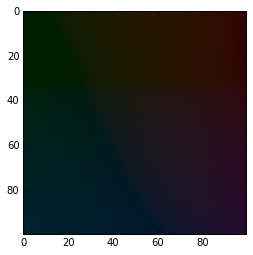

In [12]:
plt.imshow(img)